# Tutorial 3: Setting up a farm calculation

In [1]:
# Load the modules
amrwindfedir = '../../'  # Location of amrwind-frontend directory
import sys, os
sys.path.insert(1, amrwindfedir)

# Load the libraries
import amrwind_frontend as amrwind
import matplotlib.pyplot    as plt

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
# Start the AMR-Wind case
case = amrwind.MyApp.init_nogui()


## Introduction

This tutorial will demonstrate the following features: 
- How to set up a wind farm layout with multiple turbines using
  `amrwind-frontend`.
- How to run a parameter sweep over wind speed and wind direction, and
  have `amrwind-frontend` generate the necessary input files for each
  case.



## Set some wind properties

For the purposes of demonstrating how to setup a wind farm layout,
we'll start with some arbitrary wind speed and wind direction values.
The exact values don't really matter, as later on in the tutorial,
we'll change these values, but for now they'll be useful when plotting
the results.

Below we'll use a wind speed of 10 m/s and wind direction of 225
degrees.


In [3]:
case.setAMRWindInput('useWSDir', True)
case.setAMRWindInput('ABL_windspeed', 10.0, forcechange=True)
case.setAMRWindInput('ABL_winddir', 225.0, forcechange=True)
case.ABL_calculateWindVector()

## Create wind farm layout and domain

We'll use a CSV format to provde the turbine layout information.  This
will generally take the form of something like 

```
# CSV file should have columns with
# name, x, y, type, yaw, hubheight, options
T0, 500, 300, UnifCtTest, , ,
T1, 500, 700, UnifCtTest, , ,
```

Here's what each of the columns mean:

### TURBINE LAYOUT SPECIFICATIONS

| column      | description                                                                       | required/optional |
| ---         | ---                                                                               | ---               |
| `name`      | The name of the turbine (can be arbitrary).                                       | required          |
| `x`         | The x position of the turbine.                                                    | required          |
| `y`         | The y position of the turbine.                                                    | required          |
| `type`      | The turbine type (must be listed under turbine types tab)                         | required          |
| `yaw`       | The turbine yaw heading.  If not specified, turbine points directly into the wind | optional          |
| `hubheight` | The turbine hub-height.  If not specified, uses the default from the turbine type | optional          |
| `options`   | Optional parameters                                                               | optional          |



In [4]:
turbinescsv="""
# CSV file should have columns with
# name, x, y, type, yaw, hubheight, options
T0, 500, 300, UnifCtTest, , ,
T1, 500, 700, UnifCtTest, , ,
"""
case.setAMRWindInput('turbines_csvtextbox',  turbinescsv)

Note that if you already have a csv file saved somewhere, you can load that directly using the `loadTurbineCSVFile()` command, like
```python
case.loadTurbineCSVFile('turbines.csv')
```
instead of using `setAMRWindInput()` to set the variable directly.

We'll also need to set some thing things like the turbine domainsize
of `[1000, 1000, 1000]` and background mesh size of `10`m.

In [5]:
case.setAMRWindInput('turbines_domainsize', [1000.0, 1000.0, 1000.0])
case.setAMRWindInput('turbines_backgroundmeshsize', 10.0)
case.setAMRWindInput('turbines_deleteprev', True)

You can preview the locations and domain size using the `turbines_previewAllTurbines() command:`

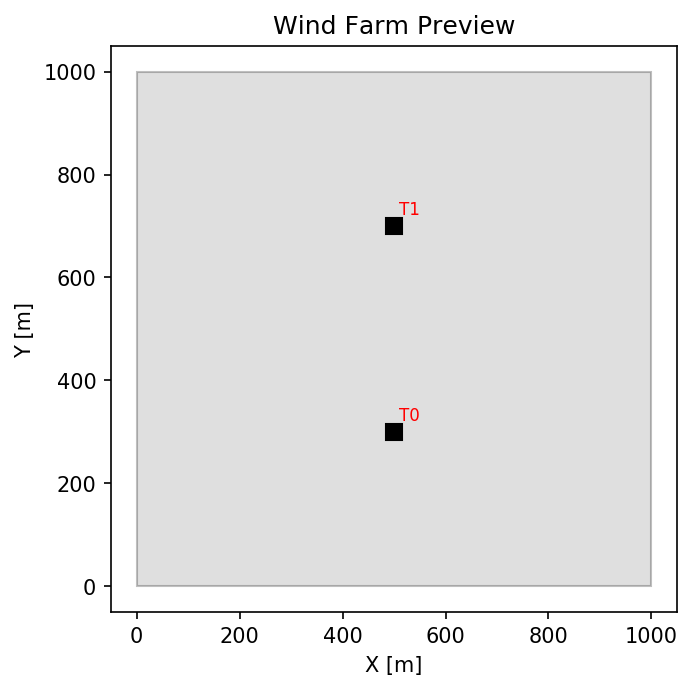

In [6]:
# Preview the turbine layout
fig, ax = plt.subplots(figsize=(5,5), facecolor='w', dpi=150)
case.turbines_previewAllTurbines(ax=ax)

In this next step, we tell it to actually create the turbines specified in the CSV input.

In [7]:
case.turbines_createAllTurbines()

# Print out existing list of turbines, just to confirm that the turbines got made
print(case.listboxpopupwindict['listboxactuator'].getitemlist())

['T0', 'T1']
